In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df_prescript  = pd.read_csv('data/all_prescriptions.csv')
df_uti_features = pd.read_csv('data/all_uti_features.csv')
df_uti_resist_lab = pd.read_csv('data/all_uti_resist_labels.csv')
data_dict = pd.read_csv('data/data_dictionary.csv')
test_uncomp_resist_data =  pd.read_csv('data/test_uncomp_resist_data.csv')
test_uncomp_uti_features =  pd.read_csv('data/test_uncomp_uti_features.csv')
train_uncomp_resist_data =  pd.read_csv('data/train_uncomp_resist_data.csv')
train_uncomp_uti_features =  pd.read_csv('data/train_uncomp_uti_features.csv')

In [11]:
print('The size of the uncomp train set', test_uncomp_resist_data.shape[0])
print('The size of the uncomp train set', train_uncomp_resist_data.shape[0])

The size of the uncomp train set 3941
The size of the uncomp train set 11865


In [22]:
# Find Feature Lists

starting = 'infection_site'
df_prescript.head()
features = [s for s in list(df_uti_features.isna().sum().index) if s.startswith(starting)]
print('\n'.join(features))
print('Number of Features:', len(features))

infection_sites - RESPIRATORY_TRACT
infection_sites - BLOOD
infection_sites - SKIN_SOFTTISSUE
infection_sites - ABSCESS_OR_FLUID_NOS
infection_sites - MUCOCUTANEOUS
infection_sites - GENITOURINARY
Number of Features: 6


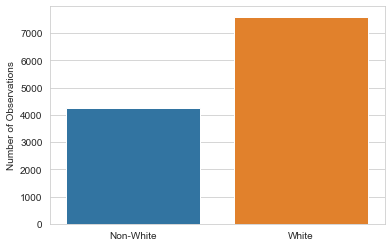

In [8]:
# Training set demographic distribution
count = train_uncomp_uti_features["demographics - is_white"].value_counts()
sns.set_style('whitegrid')
g = sns.barplot(x = count.index, y = count)
g.set(ylabel='Number of Observations')
_ = g.set(xticklabels=['Non-White', 'White'])

<AxesSubplot:xlabel='demographics - is_white', ylabel='demographics - age'>

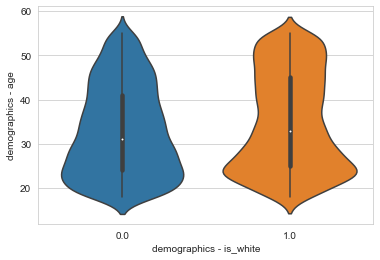

In [9]:
sns.violinplot(x = 'demographics - is_white', y = 'demographics - age', data = train_uncomp_uti_features)

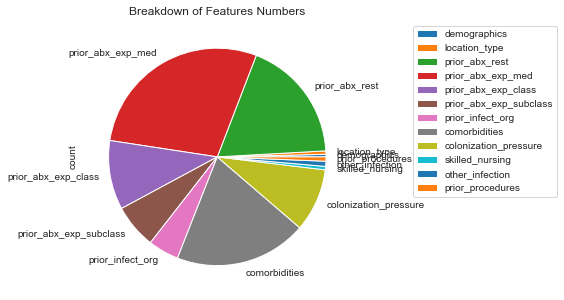

In [30]:
pie = pd.DataFrame({'count': [3, 4 , 144, 224, 81, 52, 36, 155, 74, 4, 6, 5]},
                  index=['demographics', 'location_type', 'prior_abx_rest','prior_abx_exp_med', 'prior_abx_exp_class','prior_abx_exp_subclass', 'prior_infect_org', 'comorbidities','colonization_pressure', 'skilled_nursing', 'other_infection', 'prior_procedures' ])
plot = pie.plot.pie(y='count', figsize=(5, 5))
plot.set_title("Breakdown of Features Numbers")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')

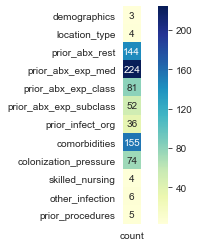

In [28]:
_  =  sns.heatmap(pie, annot=True, fmt="d",  cmap="YlGnBu", square = True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [10]:
df_uti_resist_lab.head()

,example_id,NIT,SXT,CIP,LVX,is_train,uncomplicated
0,0,0.0,0.0,0.0,0.0,0,0
1,1,0.0,0.0,0.0,0.0,1,0
2,2,0.0,0.0,1.0,1.0,1,0
3,3,0.0,0.0,0.0,0.0,1,0
4,4,0.0,0.0,0.0,0.0,1,1


In [11]:
# Study only looked at uncomplicated UTI

df_uti_resist_lab.groupby(['is_train', 'uncomplicated']).size()

is_train  uncomplicated
0         0                31999
          1                 3941
1         0                69097
          1                11865
dtype: int64

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_dict

,file,column,until,from,description
0,all_uti_resist_labels.csv,example_id,NaN,NaN,Unique specimen ID used to link between files
1,all_uti_resist_labels.csv,NIT,NaN,NaN,Indicator of resistance to nitrofurantoin
2,all_uti_resist_labels.csv,SXT,NaN,NaN,Indicator of resistance to trimethoprim-sulfam...
3,all_uti_resist_labels.csv,CIP,NaN,NaN,Indicator of resistance to ciprofloxacin
4,all_uti_resist_labels.csv,LVX,NaN,NaN,Indicator of resistance to levofloxacin
5,all_uti_resist_labels.csv,is_train,NaN,NaN,Used to denote membership in training set (200...
6,all_uti_resist_labels.csv,uncomplicated,NaN,NaN,Used to denote membership in uncomplicated UTI...
7,all_prescriptions.csv,example_id,NaN,NaN,Unique specimen ID used to link between files
8,all_prescriptions.csv,prescription,NaN,NaN,"Observed empiric prescription (one of NIT, SXT..."
9,all_prescriptions.csv,is_train,NaN,NaN,Used to denote membership in training set (200...
